In [2]:
import torch
from torch import nn

In [11]:
## Random tensors
'''
Random tensors are important because the way many neural networks learn is that they start with tensors full  of random numbers then just adjust those random numbers and then adjust those numbers to better represent the data
'''
random_tesnor = torch.rand(2,3,3)
print(random_tesnor)
print(random_tesnor.ndim)
print(random_tesnor.shape)

tensor([[[0.3022, 0.3535, 0.2556],
         [0.9694, 0.7976, 0.3629],
         [0.6156, 0.5235, 0.5235]],

        [[0.7713, 0.3409, 0.6973],
         [0.7440, 0.4458, 0.7491],
         [0.8154, 0.5877, 0.1209]]])
3
torch.Size([2, 3, 3])


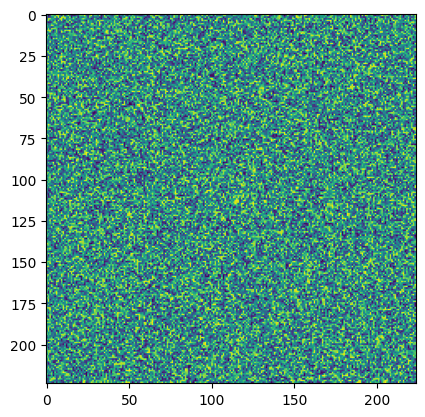

In [27]:
random_image_size_tensor = torch.rand(size=(3,224,224)) # height, width, color_channels (R,G,B)
random_image_size_tensor.shape, random_image_size_tensor.ndim
import matplotlib.pyplot as plt
plt.imshow(random_image_size_tensor[0])

In [36]:
zeros = torch.zeros(3,224,224)
zeros
#tensors range and tensors-like
one_to_ten =  torch.arange(start = 1,end = 10, step = 1)
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
torch.__version__

'2.1.0+cu121'

In [44]:
#tesor_datatypes:
float_32_tensor = torch.tensor([3.0,6.0,9.0], dtype=torch.float32, device="cuda:3", requires_grad= False)
float_16_tensor  = float_32_tensor.type(torch.float16)



print(float_32_tensor)
print(float_16_tensor)
print(float_32_tensor.dtype)

tensor([3., 6., 9.], device='cuda:3')
tensor([3., 6., 9.], device='cuda:3', dtype=torch.float16)
torch.float32


In [49]:
# float_32_tensor * float_16_tensor
float_16_tensor * float_32_tensor

tensor([ 9., 36., 81.], device='cuda:3')

In [52]:
int_32_tesnor = torch.tensor([3,6,9], dtype=torch.int64, device="cuda:3", requires_grad= False)

In [53]:
float_32_tensor  * int_32_tesnor

tensor([ 9., 36., 81.], device='cuda:3')

In [58]:
# Getting informations from tensors:
int_32_tesnor. dtype
int_32_tesnor.shape
int_32_tesnor.ndim
int_32_tesnor.device

device(type='cuda', index=3)

In [163]:
def get_tensor_metadata(tensor,show_input = False)-> torch.tensor:
    if show_input:
        print(tensor)
    return f"Tensor data type:{tensor.dtype}\nTensor shape:{tensor.shape}\nTensor device:{tensor.device}"

get_tensor_metadata(int_32_tesnor)

'Tensor data type:torch.int64\nTensor shape:torch.Size([3])\nTensor device:cuda:3'

In [78]:
#Tensor operations: addition, subtraction, multiplication (element-wise), division, matrix multiplication
#addition:
tensor_1 = torch.rand(3,10)
tensor_2 = torch.rand(10,3)
tensor_1*10


tensor([[4.1940, 4.3660, 1.7406, 6.0372, 3.2950, 3.7349, 4.2953, 4.1915, 8.3530,
         9.8292],
        [3.0272, 4.9582, 6.8494, 7.4857, 1.8449, 5.4437, 4.8358, 8.9684, 1.6975,
         2.0741],
        [8.0819, 8.2981, 1.4896, 8.0289, 0.1614, 3.3940, 5.7042, 9.3026, 4.3032,
         7.6611]])

In [79]:
%%time
torch.matmul(tensor_1,tensor_2)

CPU times: user 200 µs, sys: 64 µs, total: 264 µs
Wall time: 173 µs


tensor([[3.3294, 3.3336, 1.8807],
        [2.9411, 2.7813, 2.1411],
        [3.7198, 3.8216, 2.2455]])

# tt types of multiplication of tensors :matrix multiplication
#rules: common erros : shape errors
There are two rules that performing matric multiplication needs to satisfy:
1. **inner dimentions** must match
2. The resulting matrix has the outer dimension


In [92]:
tensor_A = torch.tensor([[1,2,3],
                         [4,5,6],
                         [7,8,9]])
tensor_B = torch.tensor([[7,8,9],
                         [10,11,12],
                         [13,14,15]])
tensor_C = torch.tensor([[1,2],
                         [3,4],
                         [5,6]])
tensor_D = torch.tensor([[7,10],
                         [8,11],
                         [9,12]])


AB = torch.mm(tensor_A,tensor_B)
CD = torch.mm(tensor_C,tensor_D.T) ## 3*2 x 2*3

In [93]:
AB.shape,CD.shape

(torch.Size([3, 3]), torch.Size([3, 3]))

In [86]:
#to fix out tensor shape issues: we can manipulate the shape using **transpose**
tensor_C

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [87]:
tensor_C.T

tensor([[1, 3, 5],
        [2, 4, 6]])

In [103]:
# tensor aggregation
#torch.mean() methods require datatypes to be float or complex
#min/max/sum/ mean
x = torch.arange(0,100,10)
torch.max(x)
torch.min(x)
torch.mean(x.type(torch.float16))
x.type(torch.float16).mean()
x.sum()
torch.sum(x)

tensor(450)

In [110]:
#positional min/mx / aggression argmax, argmax : means which index of the tensor contains the minimum or max value
print(x)
torch.argmin(x), torch.argmax(x)

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])


(tensor(0), tensor(9))

In [111]:
x[9]

tensor(90)

# VERY IMPORTANT
- Reshaping, stacking, squeezing and unsqueezing tensors
- Reshaping - to solve shape mismatching , reshapes an input tensor to a defines shape
- view - return a view of an inout tensor of certain shape but keep the same memory as the original tensor
- stacking: combine multiple tensors on top of each other (vstack) or side by side (hstack)
 - squeeze - removes all 'l' dimensions from the ternsor
- unsqueeze - add a '1 dimension to a target tensor'
- Permute - Return a view of the input with dimensions permuted (swapped) in a certain way


In [145]:
x = torch.arange(1,10)
x, x.shape, x.ndim

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), torch.Size([9]), 1)

In [153]:
# add an extra dimension
x_reshaped = x.reshape(1,9)

In [154]:
x_reshaped, x_reshaped.ndim, x_reshaped.shape

(tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]]), 2, torch.Size([1, 9]))

In [140]:
#change the view:
z = x.view(3,3)
z,x

(tensor([[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]),
 tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [142]:
z[:,2] = 10000
x,z

(tensor([    1,     2, 10000,     4,     5, 10000,     7,     8, 10000]),
 tensor([[    1,     2, 10000],
         [    4,     5, 10000],
         [    7,     8, 10000]]))

In [148]:
#stacking tensors on top of each other
x_stacked = torch.stack([x,x,x,x],dim=1)
x,x_stacked

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 tensor([[1, 1, 1, 1],
         [2, 2, 2, 2],
         [3, 3, 3, 3],
         [4, 4, 4, 4],
         [5, 5, 5, 5],
         [6, 6, 6, 6],
         [7, 7, 7, 7],
         [8, 8, 8, 8],
         [9, 9, 9, 9]]))

In [164]:
x_reshaped.squeeze().shape
print(get_tensor_metadata(x_reshaped,True))
print(get_tensor_metadata(x_reshaped.squeeze(),True))

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])
Tensor data type:torch.int64
Tensor shape:torch.Size([1, 9])
Tensor device:cpu
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Tensor data type:torch.int64
Tensor shape:torch.Size([9])
Tensor device:cpu


In [169]:
x_reshaped.squeeze().unsqueeze(dim=0)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [174]:
y = torch.rand(1,3,3)
y_squeezed = torch.squeeze(y,dim=0)
print(get_tensor_metadata(y,True))
print(get_tensor_metadata(y_squeezed,True))
y_unsqueezed = torch.unsqueeze(y_squeezed,dim=0)
print(get_tensor_metadata(y_unsqueezed,True))


tensor([[[0.0868, 0.8638, 0.6139],
         [0.5072, 0.7282, 0.4312],
         [0.0124, 0.7172, 0.3140]]])
Tensor data type:torch.float32
Tensor shape:torch.Size([1, 3, 3])
Tensor device:cpu
tensor([[0.0868, 0.8638, 0.6139],
        [0.5072, 0.7282, 0.4312],
        [0.0124, 0.7172, 0.3140]])
Tensor data type:torch.float32
Tensor shape:torch.Size([3, 3])
Tensor device:cpu
tensor([[[0.0868, 0.8638, 0.6139],
         [0.5072, 0.7282, 0.4312],
         [0.0124, 0.7172, 0.3140]]])
Tensor data type:torch.float32
Tensor shape:torch.Size([1, 3, 3])
Tensor device:cpu


In [175]:
y_permuted = torch.permute(y,(2,0,1))
print(get_tensor_metadata(y_permuted,True))

tensor([[[0.0868, 0.5072, 0.0124]],

        [[0.8638, 0.7282, 0.7172]],

        [[0.6139, 0.4312, 0.3140]]])
Tensor data type:torch.float32
Tensor shape:torch.Size([3, 1, 3])
Tensor device:cpu


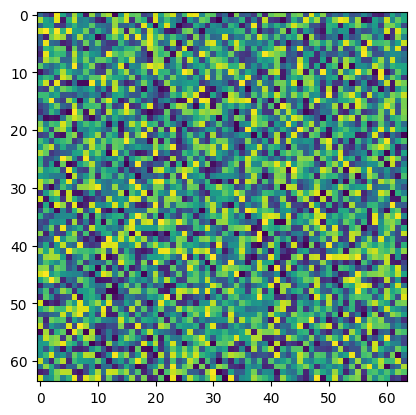

In [176]:
random_img_data = torch.rand(64,64,3)
img_perm = torch.permute(random_img_data, dims=(2,0,1))
plt.imshow(img_perm[0])

In [177]:
#indexing in tensors  (selecting data from tensords) very familiar to numpy
x = torch.arange(1,10,1).reshape(1,3,3)
x.shape, x

(torch.Size([1, 3, 3]),
 tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]))

In [181]:
x[0] #dimension 0

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [189]:
#dimension 1
x, x[0][:,-1], x[0][2][2], x[0][2][:]

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 tensor([3, 6, 9]),
 tensor(9),
 tensor([7, 8, 9]))

In [191]:
x[:,:,2] , x[0,:,2]

(tensor([[3, 6, 9]]), tensor([3, 6, 9]))

In [193]:
x[0,:,-1]

tensor([3, 6, 9])